# Correlating NYT Data with Market Data

### Loading in Data

In [1]:
import os
import json
import time
import requests
import datetime
import dateutil
import matplotlib.pyplot as plt
import pandas as pd
import glob
import string
from dateutil.relativedelta import relativedelta
import numpy as np
import yfinance as yf

In [2]:
spy = yf.download("SPY")
articlesD = pd.read_csv("./Data/ArticlesD.csv")
articlesR = pd.read_csv("./Data/ArticlesR.csv")
dailydem = pd.read_csv("./Data/DailyDem.csv")
dailyrep = pd.read_csv("./Data/DailyRep.csv")

xlk = yf.download("XLK")
xlv = yf.download("XLV")
xlf = yf.download("XLF")
xly = yf.download("XLY")
xli = yf.download("XLI")
xlp = yf.download("XLP")
xlu = yf.download("XLU")
xle = yf.download("XLE")
xlc = yf.download("XLC")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def modifyDataSet(fund):
    return np.log(fund["Open"]-fund["Close"]).dropna()
    
listOfFunds = [spy , xlk , xlv, xlf, xly , xli, xlp, xlu, xle, xlc]
for etf in listOfFunds:
    etf["Log Returns"] = np.log(etf["Open"]/etf["Close"])

In [4]:
xlc["Log Returns"]

Date
2018-06-19   -0.005218
2018-06-20   -0.002574
2018-06-21    0.009897
2018-06-22    0.001979
2018-06-25    0.015650
                ...   
2020-11-19   -0.010361
2020-11-20    0.003126
2020-11-23    0.003125
2020-11-24   -0.017634
2020-11-25    0.002145
Name: Log Returns, Length: 616, dtype: float64

In [5]:
# Match nyt data to the data we have on SPY and combine them into one dataframe
# spy = spy.iloc[6969:] # Remove this time
spy.head()

,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.079659,1003200,0.000711
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.265144,480500,-0.006376
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.320782,201300,-0.002823
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.599014,529400,-0.009107
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.710312,531500,-0.000695


(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

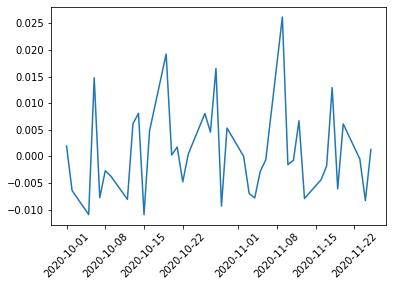

In [6]:
# def performRegression(company):
#     fb = yf.download(company)
#     fb = fb[['Adj Close']]
#     fb["Date"] = fb[(fb["Date"] >='2020-10-1')&(fb["Date"]<'2020-11-30')]
#     Image('fb.png')
#     fb_factors = data.reindex(index=fb.index)
#     fb_factors = fb_factors.dropna()
#     fb = fb.pct_change().fillna(0)
#     fb = fb.loc[fb_factors.index]
#     fb_model = linear_model.LinearRegression()
#     fb_model.fit(X=fb_factors, y=fb['Adj Close'])
#     return [fb_model.coef_, fb_model.intercept_, fb_model.score(X=fb_factors, y=fb['Adj Close'])]

# spy= spy[(spy["Date"] >='2020-10-1')&(spy["Date"]<'2020-11-30')]
# spy.head()

spy = spy["2020-10-1":'2020-11-30']
plt.plot(spy["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

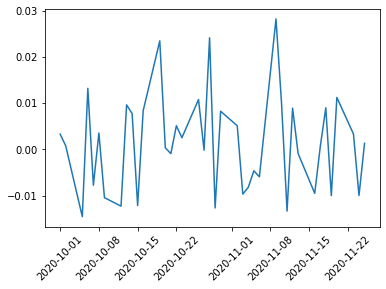

In [7]:
xlk = xlk["2020-10-1":'2020-11-30']
plt.plot(xlk["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

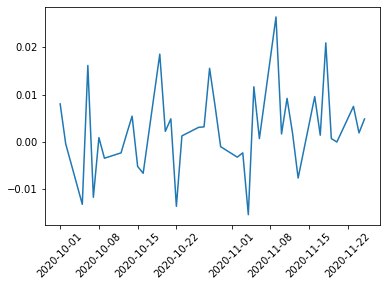

In [8]:
xlv = xlv["2020-10-1":'2020-11-30']
plt.plot(xlv["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

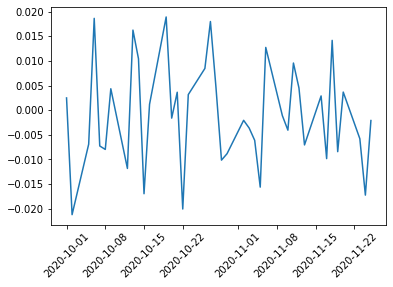

In [9]:
xlf = xlf["2020-10-1":'2020-11-30']
plt.plot(xlf["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

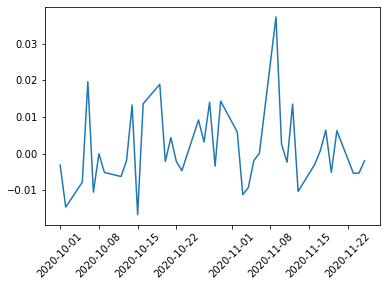

In [10]:
xly = xly["2020-10-1":'2020-11-30']
plt.plot(xly["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

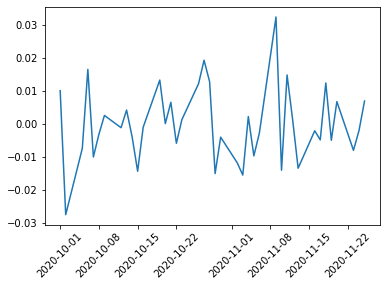

In [11]:
xli = xli["2020-10-1":'2020-11-30']
plt.plot(xli["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

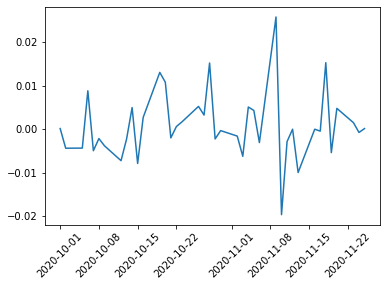

In [12]:
xlp = xlp["2020-10-1":'2020-11-30']
plt.plot(xlp["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

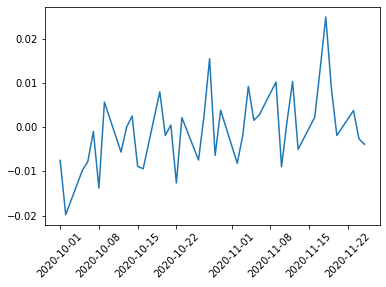

In [13]:
xlu = xlu["2020-10-1":'2020-11-30']
plt.plot(xlu["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

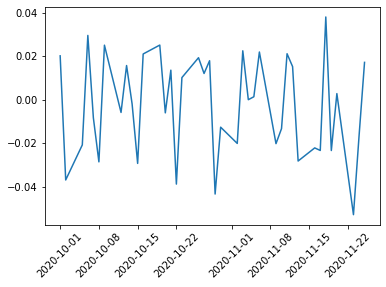

In [14]:
xle = xle["2020-10-1":'2020-11-30']
plt.plot(xle["Log Returns"])
plt.xticks(rotation=45)

(array([737699., 737706., 737713., 737720., 737730., 737737., 737744.,
        737751.]),
 <a list of 8 Text major ticklabel objects>)

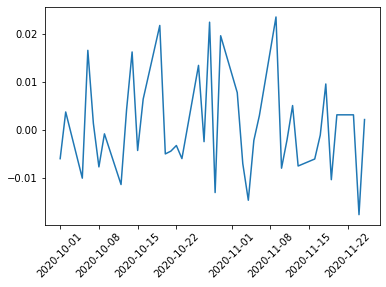

In [15]:
xlc = xlc["2020-10-1":'2020-11-30']
plt.plot(xlc["Log Returns"])
plt.xticks(rotation=45)

In [21]:
# def cov_cor(sentiment, logReturns):
#     '''Returns a tuple containing the correlation and
#     covariance respectively between two timeseries dataframes'''
#     cor = sentiment.corr(logReturns)
#     cov = sentiment.cov(logReturns) 
#     return (cor, cov)

# cov_cor(dailydem, xlc["Log Returns"])
dailydem["sentiment score"].corr(xlc["Log Returns"])
# print(dailydem.tail())
# print(xlc.tail())

nan